<font color='red'>Assignment:</font> Load "svm_data.csv" into a DataFrame df.

In [ ]:
import pandas as pd
df=pd.read_csv('svm_data.csv')
df

,x,y,label
0,0.071255,-0.196588,0
1,-1.028290,0.362087,0
2,1.264656,0.286208,0
3,-0.958468,1.781923,0
4,-1.736951,1.174945,0
...,...,...,...
106,-9.512374,-3.549688,1
107,-9.436382,-4.099574,1
108,-9.013039,-5.314705,1
109,-9.876212,-3.531099,1


<font color='red'>Assignment:</font> Import **SVC** from sklearn, create a pipeline with **StandardScaler**, and train a SVM classifier using **Linear Kernel** to predict labels with **x** and **y**. Do not split train/test data this time.

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

x = []
for i, j in zip(df['x'], df['y']):
  x.append([i, j])


Y=df['label']

steps = [('scale', StandardScaler()),
          ('svc', SVC(kernel = 'linear',gamma = 'scale', shrinking = False))]

svc_scaled_model=Pipeline(steps)
svc_scaled_model.fit(x,Y)


#scaled_svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))


Pipeline(steps=[('scale', StandardScaler()),
                ('svc', SVC(kernel='linear', shrinking=False))])

In [ ]:
prediction = svc_scaled_model.predict(x)
print(prediction)
# check the accuracy on the training set

print(svc_scaled_model.score(x,Y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1.0


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,Y))

Confusion Matrix:
 [[75  0]
 [ 0 36]]


In [ ]:
# get support vectors
model2=SVC(kernel = 'linear',gamma = 'scale', shrinking = False)
model2.fit(x,Y)
print(model2.decision_function)
model2.support_vectors_

<bound method BaseSVC.decision_function of SVC(kernel='linear', shrinking=False)>


array([[-2.27979345, -0.46318566],
       [-4.54778752,  3.39755814],
       [-6.18839509, -1.73123515]])

<font color='red'>Assignment:</font> Find out the **support vectors** and plot them together with data points.

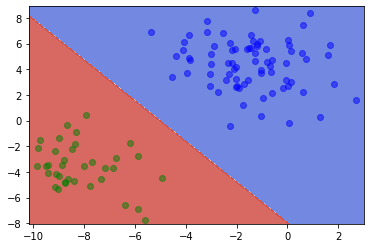

In [ ]:
### sample code for plotting decision boundaries ###

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create a grid
x_min, x_max = df.iloc[:, 0].min() - 0.3, df.iloc[:, 0].max() + 0.3
y_min, y_max = df.iloc[:, 1].min() - 0.3, df.iloc[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# get model predictions for all points on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# plot decision regions and boundaries
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# plot original data points
plt.scatter(df[df.label == 0].x, df[df.label == 0].y, marker = 'o', color = 'blue', 
            alpha = 0.5, label = 'label = 0')
plt.scatter(df[df.label == 1].x, df[df.label == 1].y, marker = 'o', color = 'green', 
            alpha = 0.5, label = 'label = 1')

########### add your code here to plot support vectors ##############



<font color='red'>Question:</font> What are support vectors?

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

<font color='red'>Question:</font> How many support vectors are there in this model? Where are they located?

3 support vectors

<font color='red'>Assignment:</font> What is the default **C**? Change hyper parameter **C** and find out how the number and locations of support vectors are affected.

Soft margin SVM allows some misclassification to happen by relaxing the hard constraints of Support Vector Machine. Soft margin SVM is implemented with the help of the Regularization parameter (C). Regularization parameter (C): It tells us how much misclassification we want to avoid.

<font color='red'>Question:</font> When **C** is relatively small (e.g. 0.01), how many support vectors in positive and negative classes, respectively? Do you see any problem with that?

1. Regularization parameter (C)

2. Gamma parameter

3. Kernel

4. Degree

5. Random state

<font color='red'>Assignment:</font> Balance the classes (using **class_weight**), re-train the model, and find the change of support vector numbers in positive and negative classes.

In [ ]:
svc_model_balanced = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,class_weight='balanced')
svc_model_balanced.fit(x,Y)
svc_model_balanced.support_vectors_

array([[-2.27979345, -0.46318566],
       [-4.54778752,  3.39755814],
       [-6.18839509, -1.73123515]])

<font color='red'>Question:</font> What is a hyperplane? What is the optimal hyperplane for a SVM model?

In geometry, a hyperplane is a subspace whose dimension is one less than that of its ambient space. For example, if a space is 3-dimensional then its hyperplanes are the 2-dimensional planes, while if the space is 2-dimensional, its hyperplanes are the 1-dimensional lines. 

<font color='red'>Question:</font> What is the difference between hard margin and soft margin? Which margin was adopted in the above model?

Soft_margin SVM :This idea is based on a simple premise: allow SVM to make a certain number of mistakes and keep margin as wide as possible so that other points can still be classified correctly. 

A hard margin means that an SVM is very rigid in classification and tries to work extremely well in the training set, causing overfitting.

<font color='red'>Question:</font> What is hinge loss?

In machine learning, the hinge loss is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification.

For an intended output t = ±1 and a classifier score y, the hinge loss of the prediction y is defined as

l(y)=max(0, 1-t.y)

The hinge loss is a specific type of cost function that incorporates a margin or distance from the classification boundary into the cost calculation. Even if new observations are classified correctly, they can incur a penalty if the margin from the decision boundary is not large enough.

<font color='red'>Question:</font> What is the difference between SVM and Logistic Regression? What are the pros and cons of these two algorithm?

<font color='red'>Question:</font> Given a data set with many columns and a relatively small amount of rows, which algorithm could be better? SVM or Logistic Regression? Why?

When To Use Logistic Regression vs Support Vector Machine
Depending on the number of training sets (data)/features that you have, you can choose to use either logistic regression or support vector machine.

Lets take these as an example where :
n = number of features,
m = number of training examples

1. If n is large (1–10,000) and m is small (10–1000) : use logistic regression or SVM with a linear kernel.

2. If n is small (1–10 00) and m is intermediate (10–10,000) : use SVM with (Gaussian, polynomial etc) kernel

3. If n is small (1–10 00), m is large (50,000–1,000,000+): first, manually add more features and then use logistic regression or SVM with a linear kernel

<font color='red'>Assignment:</font> Try **rbf** kernel on the above data.

In [ ]:
svc_model_balanced_rbf = SVC(kernel = 'rbf',gamma = 'scale', shrinking = False,class_weight='balanced')
svc_model_balanced_rbf.fit(x,Y)
svc_model_balanced_rbf.support_vectors_

array([[ 0.07125535, -0.19658753],
       [-1.02829001,  0.36208744],
       [-2.27979345, -0.46318566],
       [-4.54778752,  3.39755814],
       [ 0.88795195,  8.34069337],
       [-5.37552364,  6.87881793],
       [-6.18839509, -1.73123515],
       [-4.94106109, -4.4506181 ],
       [-7.9200633 ,  0.42061075],
       [-5.61631305, -7.74607039]])

Kernel functions essentially take the dot product of transformed input vectors.

<font color='red'>Question:</font> How does "kernel trick" work? What is rbf kernel? Where are the support vectors located?

Kernel functions essentially take the dot product of transformed input vectors.

Kernel functions are generalized functions that take two vectors (of any dimension) as input and output a score that denotes how similar the input vectors are.

A simple kernel function is the dot product of 2 vectors.

 If the dot product is small, we conclude that vectors are different and if the dot product is large, we conclude that vectors are more similar.

The kernel trick:

We can use any fancy Kernel function in place of dot product that has the capability of measuring similarity in higher dimensions (where it could be more accurate; more on this later), without increasing the computational costs much. This is essentially known as the Kernel Trick.


The “trick” is that kernel methods represent the data only through a set of pairwise similarity comparisons between the original data observations x (with the original coordinates in the lower dimensional space), instead of explicitly applying the transformations ϕ(x) and representing the data by these transformed coordinates in the higher dimensional feature space.

Support Vector Machine deals with nonlinear data by transforming it into a higher dimension where it is linearly separable. Support Vector Machine does so by using different values of Kernel. We have various options available with kernel like, ‘linear’, “rbf”, ”poly” and others (default value is “rbf”). Here “rbf” and “poly” are useful for non-linear hyper-plane.


RBF Kernel

Radial Basis Kernel is a kernel function that is used in machine learning to find a non-linear classifier or regression line.